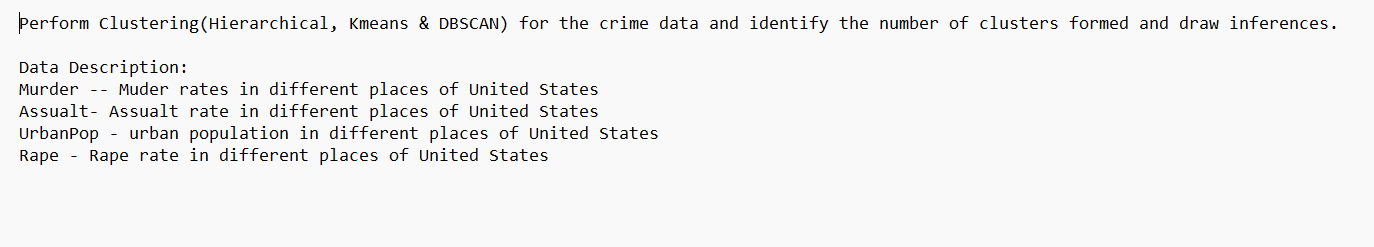

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#Naming the 1st Columns
crime_data.rename(columns = {'Unnamed: 0':'States'}, inplace = True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## EDA

In [7]:
#checking null values
crime_data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

No null values in dataset

In [8]:
### Checking duplicate values 
crime_data[crime_data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


No duplicate values in data set

In [9]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


## Visualizing data

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
from matplotlib.lines import Line2D 

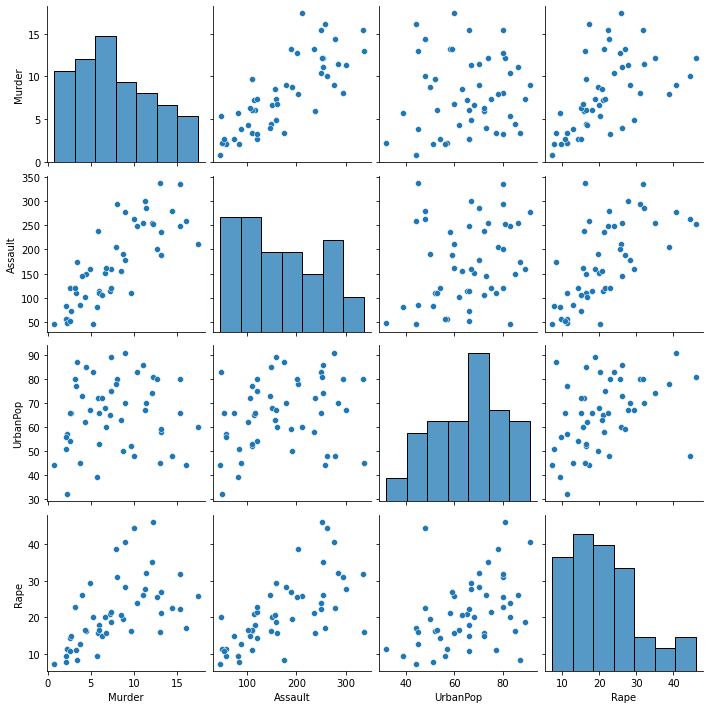

In [11]:
sns.pairplot(crime_data)
plt.show()

<AxesSubplot:>

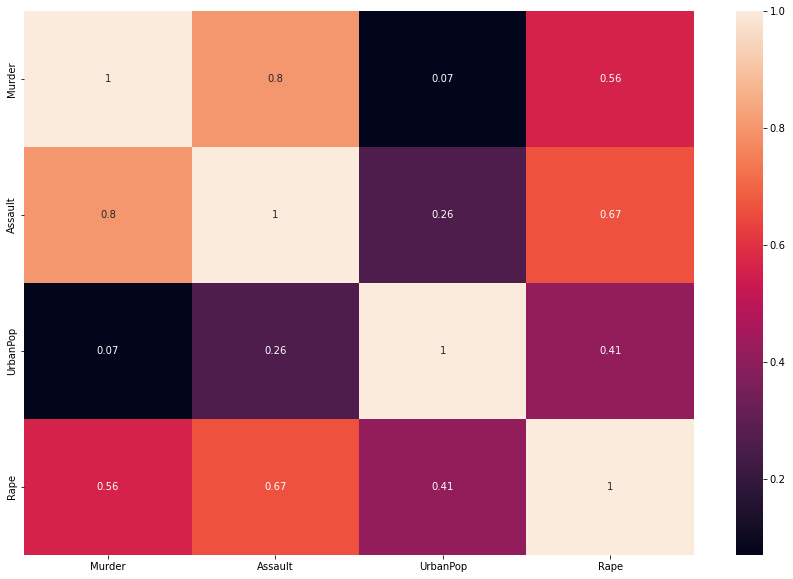

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(crime_data.corr(), annot=True)

## Standardization

In [13]:
# STANDARDIZATING DATA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(crime_data.iloc[:,1:])     ## All columns except for states
cd_s = pd.DataFrame(x_scaled)
cd_s.columns = ['Murder','Assault','UrbanPop','Rape']
cd_s = pd.concat([crime_data['States'],cd_s],axis=1)
cd_s.head()


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


## WCSS 
###### Finding optimum number of clusters

In [14]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cd_s.iloc[:,1:])
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 50.57105884207456,
 43.98247652624927,
 40.79693792564822,
 35.28169802539336,
 33.20811319497208,
 26.881541874962835]

Text(0, 0.5, 'WCSS')

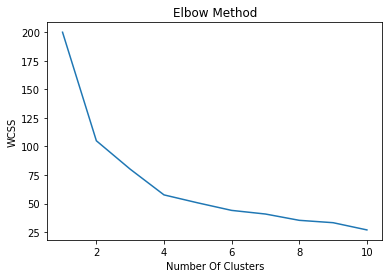

In [16]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')

Slightly Change in WCSS value from k=4 to 5


So, with the help of Elbow Method, Number of Clusters = 4


Hence k=4

In [17]:
X = cd_s.iloc[:,1:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

y_means

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [18]:
# X[y_means == 0]   # Values in 0 Number clusters
# X[y_means == 1]   # Values in 1 Number clusters and so on.
# X[y_means == 1,0]   # To extract 1st value
# X[y_means == 1,1]   # To extract 2st value and so on.


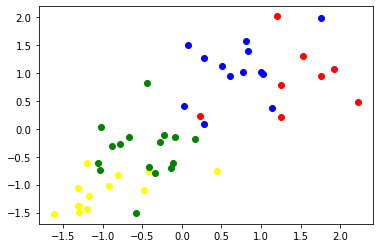

In [19]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='yellow')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='blue')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='green')


## Assign y_mean values to dataset

In [20]:
cd_s['y_means'] = y_means
cd_s.head()

,States,Murder,Assault,UrbanPop,Rape,y_means
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,0
1,Alaska,0.513019,1.118060,-1.224067,2.509424,2
2,Arizona,0.072361,1.493817,1.009122,1.053466,2
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,0
4,California,0.281093,1.275635,1.776781,2.088814,2


In [21]:
y_means_centers = cd_s.groupby('y_means').agg(['mean']).reset_index()
y_means_centers

,y_means,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,1.426224,0.883211,-0.822791,0.019467
1,1,-0.971303,-1.117836,-0.939550,-0.976578
2,2,0.702127,1.049994,0.729974,1.289904
3,3,-0.494407,-0.386484,0.581676,-0.264310


## Cluster visualization

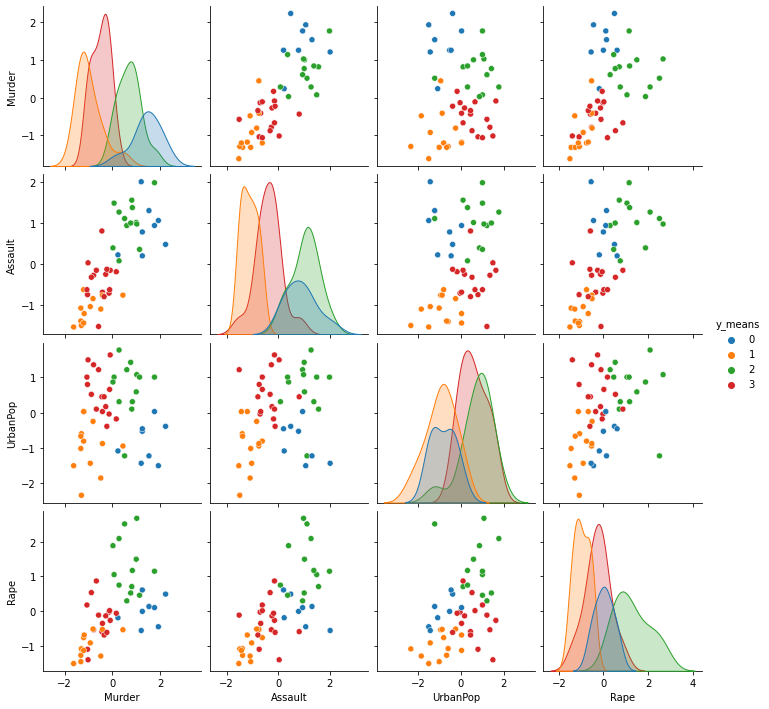

In [22]:
sns.pairplot(cd_s,
            palette=sns.color_palette("tab10")[:4],
            hue = 'y_means'
            )

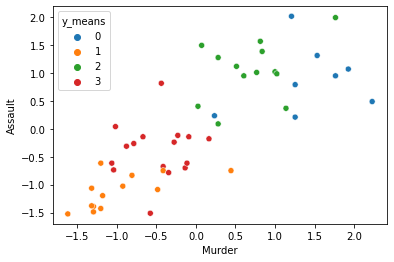

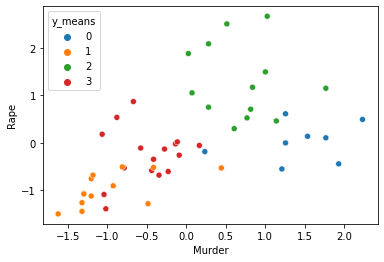

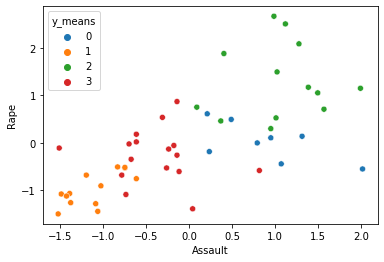

In [23]:
sns.scatterplot(x='Murder', y='Assault', data = cd_s, hue='y_means',palette=sns.color_palette("tab10")[:4])
plt.show()
sns.scatterplot(x='Murder', y='Rape', data=cd_s, hue = 'y_means' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='Assault', y='Rape', data=cd_s, hue = 'y_means' ,palette=sns.color_palette("tab10")[:4])               
plt.show()

Inferences from the clusters 

-Cities belongs to cluster_id = 0 has lowest murder, assault and rape rate


-Cities belongs to cluster_id = 2 has slightly higher murder, assault and rape rate than cities belongs to cluster_id = 0


-Cities belongs to cluster_id = 1 and 3 has highest crime rate

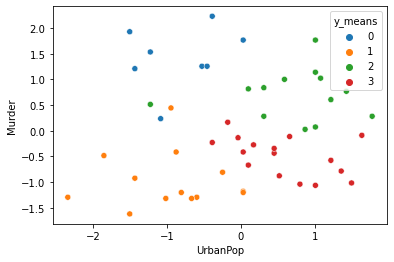

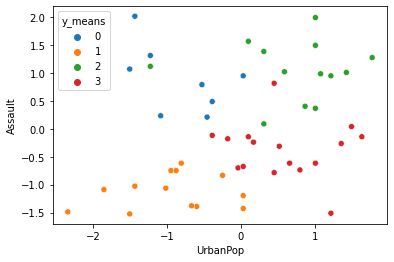

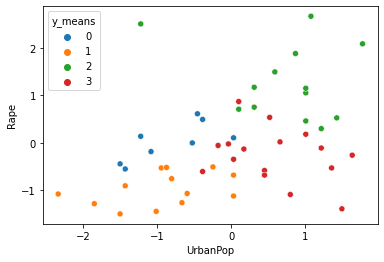

In [24]:
sns.scatterplot(x='UrbanPop', y='Murder', data = cd_s, hue='y_means',palette=sns.color_palette("tab10")[:4])
plt.show()
sns.scatterplot(x='UrbanPop', y='Assault', data=cd_s, hue = 'y_means' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='UrbanPop', y='Rape', data=cd_s, hue = 'y_means' ,palette=sns.color_palette("tab10")[:4])               
plt.show()

Rape Rate is higher in Urban Population


Murder and Assault rate is same in urban and non urban population


# DBSCAN (Density Based Spatial Clustering of Applications with Noise) 

In [25]:
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
cd_s.head()

,States,Murder,Assault,UrbanPop,Rape,y_means
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,0
1,Alaska,0.513019,1.118060,-1.224067,2.509424,2
2,Arizona,0.072361,1.493817,1.009122,1.053466,2
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,0
4,California,0.281093,1.275635,1.776781,2.088814,2


In [27]:
# STANDARDIZATING DATA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(crime_data.iloc[:,1:])     ## All columns except for states
cd_s1 = pd.DataFrame(x_scaled)
cd_s1.columns = ['Murder','Assault','UrbanPop','Rape']
cd_s1 = pd.concat([crime_data['States'],cd_s1],axis=1)
cd_s1.head()


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [28]:
from sklearn.cluster import DBSCAN


X = cd_s1.iloc[:,1:].values
dbscan = DBSCAN(eps=0.8, min_samples=5)
y_pred = dbscan.fit_predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

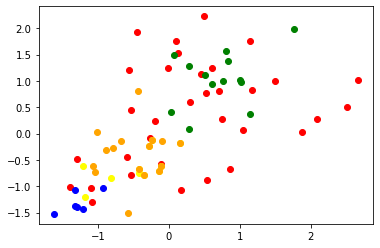

In [29]:
plt.scatter(X[y_pred == -1,-1],X[y_pred == -1,0],color='red')
plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1],color='yellow')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='orange')


## Assign y_pred values to dataset

In [30]:
cd_s1['y_pred'] = y_pred
cd_s1.head()

,States,Murder,Assault,UrbanPop,Rape,y_pred
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,-1
1,Alaska,0.513019,1.118060,-1.224067,2.509424,-1
2,Arizona,0.072361,1.493817,1.009122,1.053466,-1
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,-1
4,California,0.281093,1.275635,1.776781,2.088814,-1


### DBSCAN Cluster Visualisation

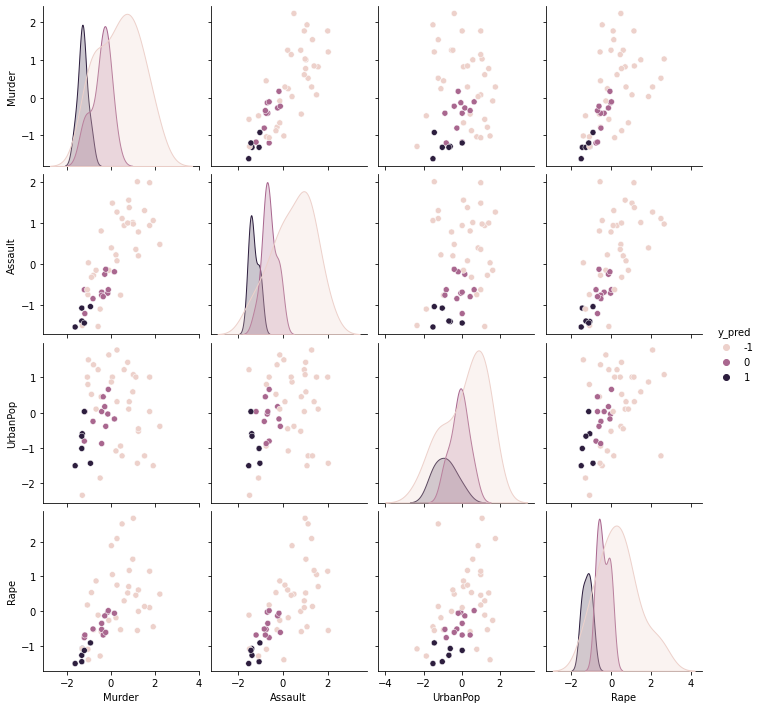

In [31]:
sns.pairplot(cd_s1,
             hue = 'y_pred'
            )

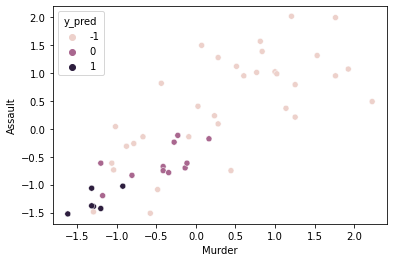

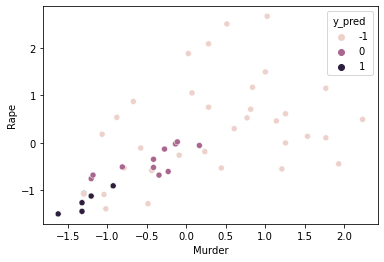

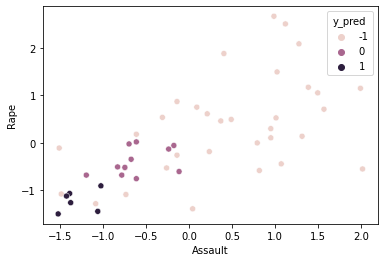

In [32]:
sns.scatterplot(x='Murder', y='Assault', data = cd_s1, hue='y_pred')
plt.show()
sns.scatterplot(x='Murder', y='Rape', data=cd_s1, hue = 'y_pred')               
plt.show()
sns.scatterplot(x='Assault', y='Rape', data=cd_s1, hue = 'y_pred')               
plt.show()

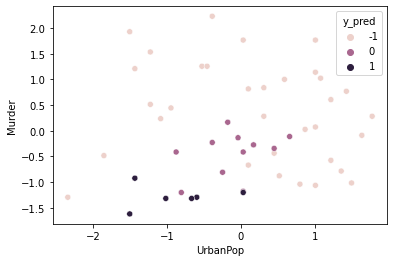

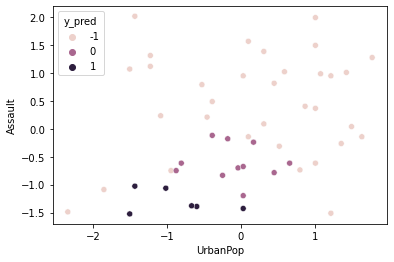

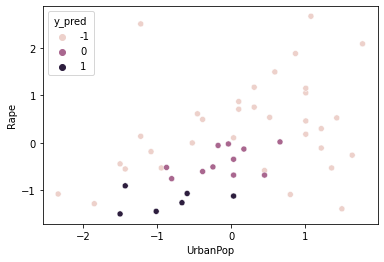

In [33]:
sns.scatterplot(x='UrbanPop', y='Murder', data = cd_s1, hue='y_pred')
plt.show()
sns.scatterplot(x='UrbanPop', y='Assault', data=cd_s1, hue = 'y_pred')               
plt.show()
sns.scatterplot(x='UrbanPop', y='Rape', data=cd_s1, hue = 'y_pred')               
plt.show()

# Hierarchical Clustering

#### Noramlization of Data 

In [34]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit_transform(crime_data.iloc[:,1:])
cd_n = pd.DataFrame(norm)
cd_n.columns = ['Murder','Assault','UrbanPop','Rape']
cd_n = pd.concat([crime_data['States'],cd_n],axis=1)
cd_n.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465


In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

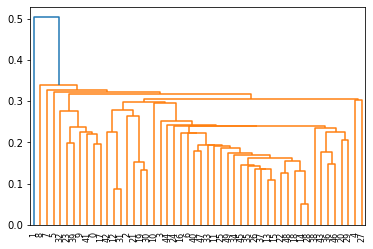

In [36]:
# create dendrogram

dendrogram = sch.dendrogram(sch.linkage(cd_n.iloc[:,1:], method='single'))

In [37]:
# create clusters

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [38]:
y_hc = hc.fit_predict(cd_n.iloc[:,1:])
clusters = pd.DataFrame(y_hc, columns=['clusters'])

In [39]:
cd_n['h_clusterid']= hc.labels_
hc.labels_

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

#### Assign cluster values to dataset

In [40]:
cd_n.head()

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,0.746988,0.654110,0.440678,0.359173,0
1,Alaska,0.554217,0.746575,0.271186,0.961240,3
2,Arizona,0.439759,0.852740,0.813559,0.612403,0
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0
4,California,0.493976,0.791096,1.000000,0.860465,0


##### Hierarchical Clustering Visualization

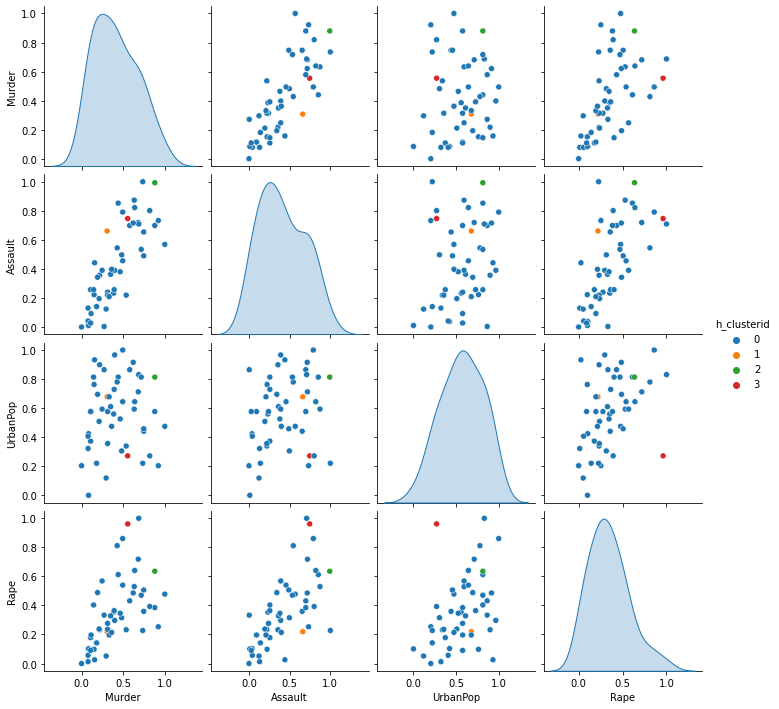

In [41]:
sns.pairplot(cd_n,
             palette=sns.color_palette("tab10")[:4],
             hue = 'h_clusterid'
            )

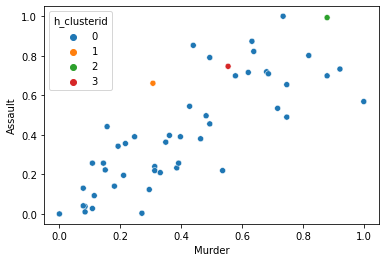

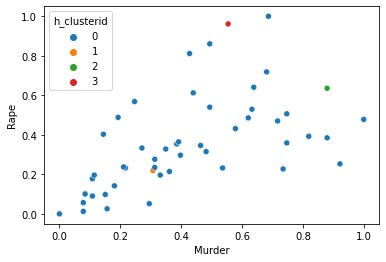

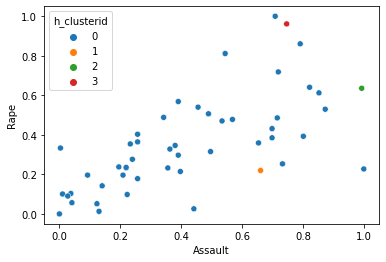

In [42]:
sns.scatterplot(x='Murder', y='Assault', data=cd_n, hue = 'h_clusterid' ,palette=sns.color_palette("tab10")[:4])                 
plt.show()
sns.scatterplot(x='Murder', y='Rape', data=cd_n, hue = 'h_clusterid' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='Assault', y='Rape', data=cd_n, hue = 'h_clusterid' ,palette=sns.color_palette("tab10")[:4])              
plt.show()

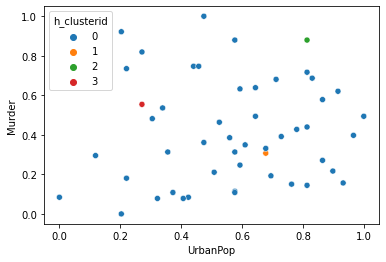

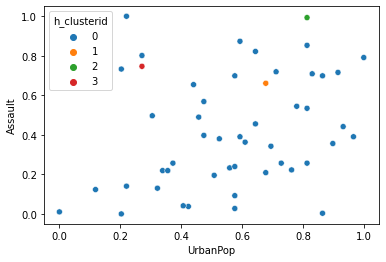

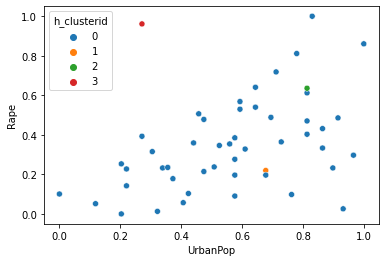

In [43]:
sns.scatterplot(x='UrbanPop', y='Murder', data=cd_n, hue = 'h_clusterid' ,palette=sns.color_palette("tab10")[:4])                 
plt.show()
sns.scatterplot(x='UrbanPop', y='Assault', data=cd_n, hue = 'h_clusterid' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='UrbanPop', y='Rape', data=cd_n, hue = 'h_clusterid' ,palette=sns.color_palette("tab10")[:4])              
plt.show()